In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Banking.csv')
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [3]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

Income levels
Medium    1517
Low       1027
High       456
Name: count, dtype: int64


<Axes: xlabel='Income levels'>

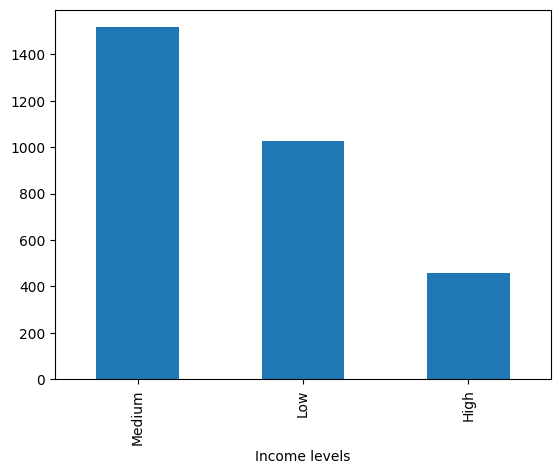

In [47]:
## Coverting Income Estimated into Categorical data.
bins=[0,100000,300000, float('inf')]
labels=['Low','Medium','High']
df['Income levels']=pd.cut(df['Estimated_Income'],bins=bins,labels=labels,right=False)
print(df['Income levels'].value_counts())
df['Income levels'].value_counts().plot(kind='bar')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Client_ID                 3000 non-null   object  
 1   Name                      3000 non-null   object  
 2   Age                       3000 non-null   int64   
 3   Location_ID               3000 non-null   int64   
 4   Joined_Bank               3000 non-null   object  
 5   Banking_Contact           3000 non-null   object  
 6   Nationality               3000 non-null   object  
 7   Occupation                3000 non-null   object  
 8   Fee_Structure             3000 non-null   object  
 9   Loyalty_Classification    3000 non-null   object  
 10  Estimated_Income          3000 non-null   float64 
 11  Superannuation_Savings    3000 non-null   float64 
 12  Amount_of_Credit_Cards    3000 non-null   int64   
 13  Credit_Card_Balance       3000 non-null   float6

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### CATEGORICAL ANALYSIS

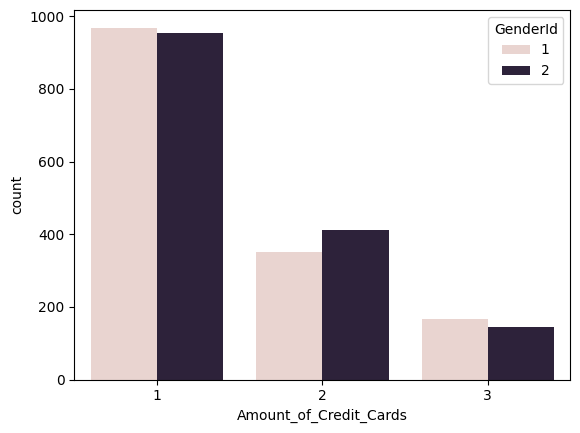

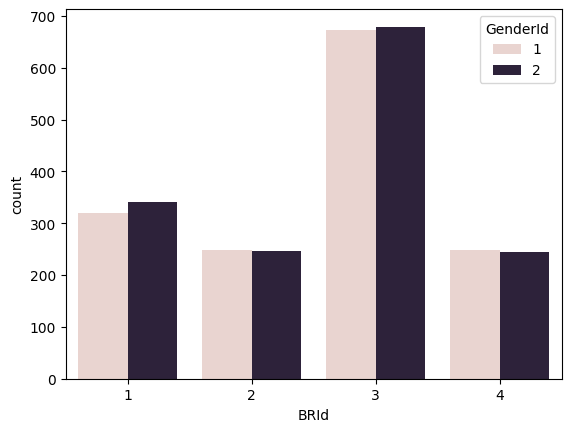

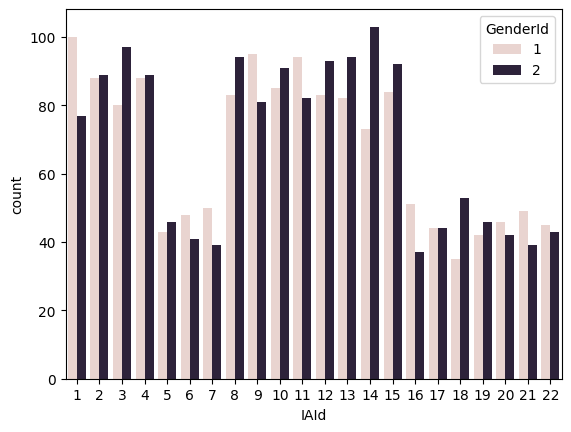

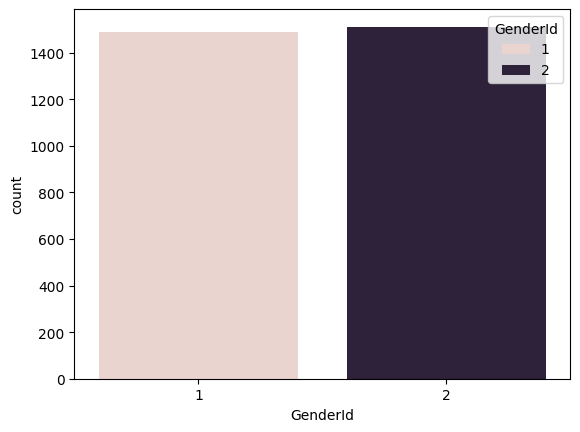

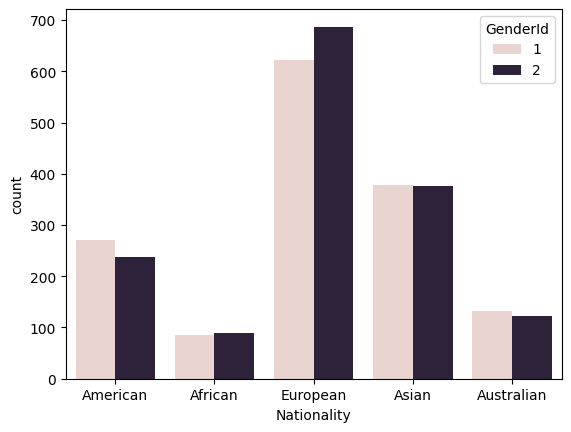

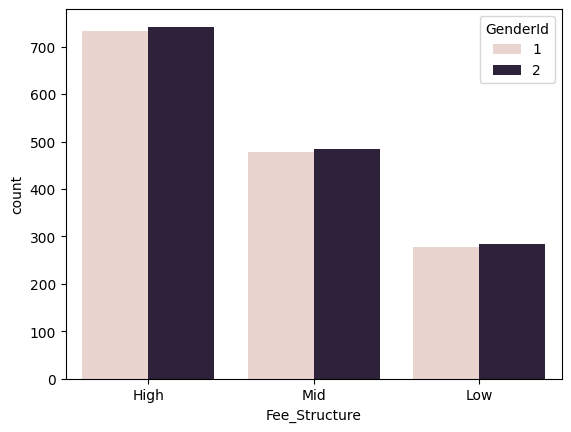

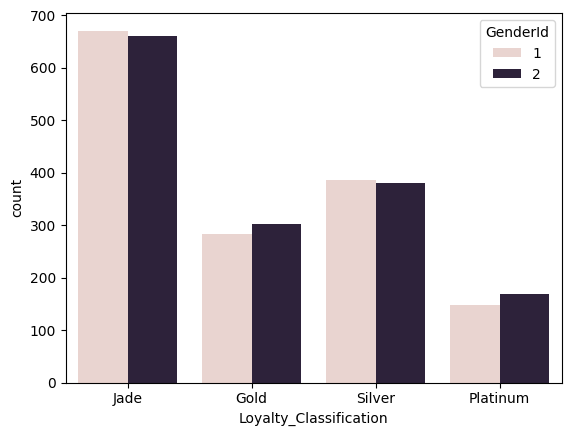

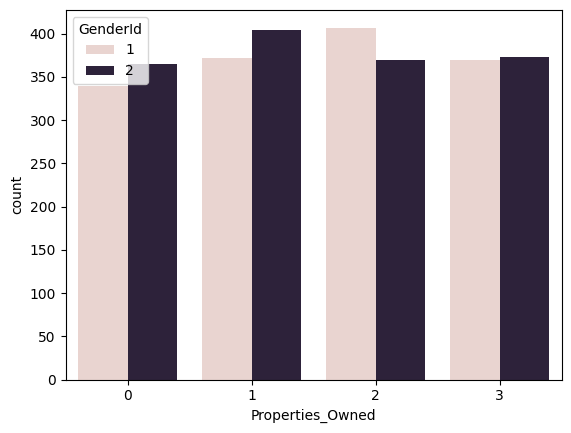

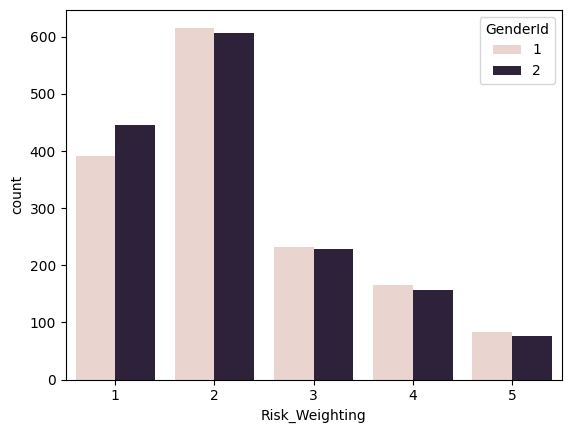

In [23]:
##Bivariate analysis of categorical columns based on Gender. 1=Male,2=Female
catcols=df[['Amount_of_Credit_Cards','BRId','IAId','GenderId','Nationality','Fee_Structure','Loyalty_Classification','Properties_Owned','Risk_Weighting']].columns
for i,pred in enumerate(catcols):
    plt.figure(i)
    sns.countplot(data=df,x=pred,hue=df['GenderId'])

Not so insightful as males and females have almost equal distribution in every parameter. Let us analyse by another parameter.

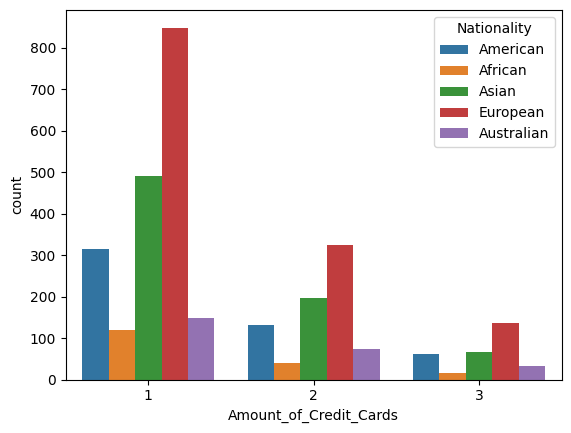

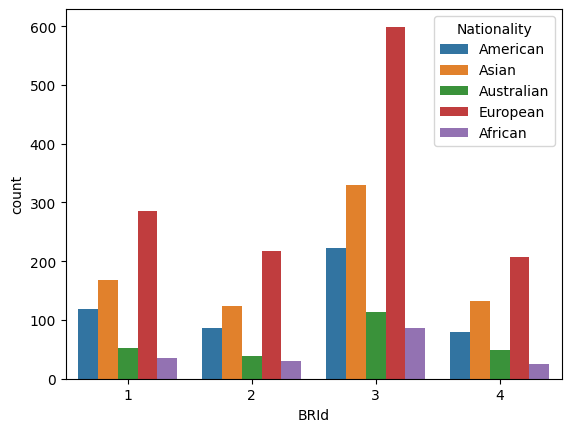

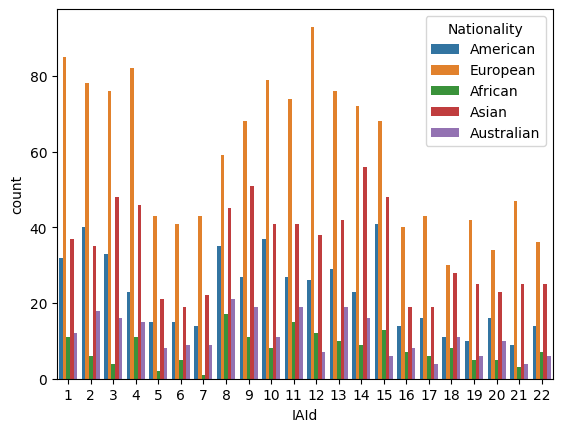

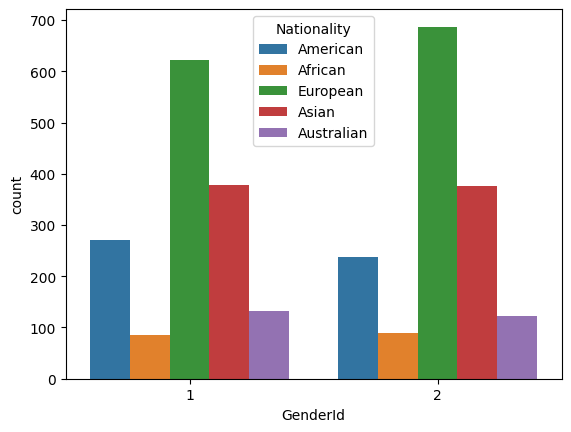

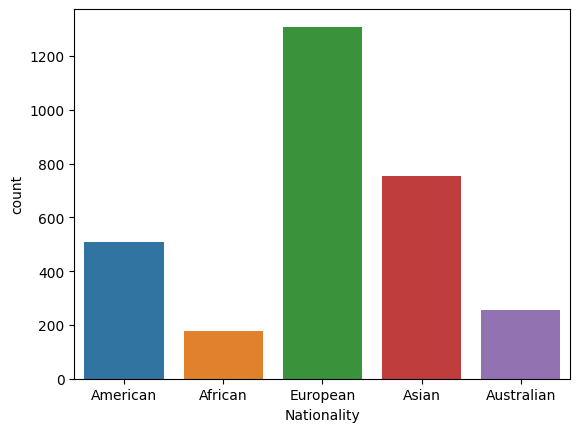

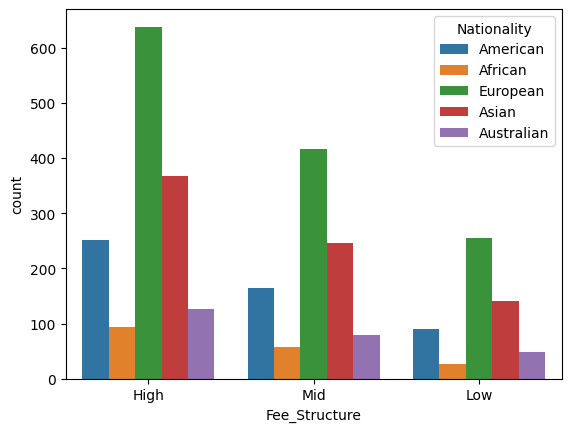

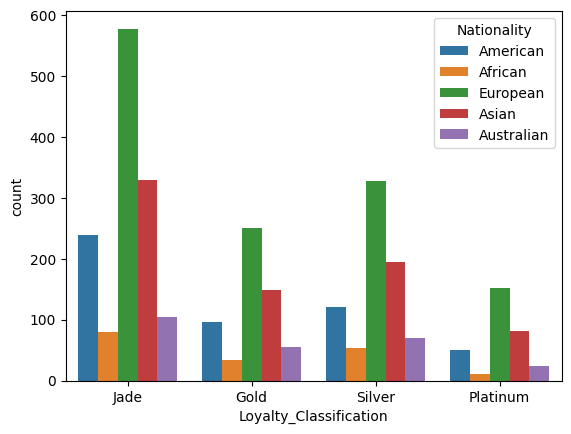

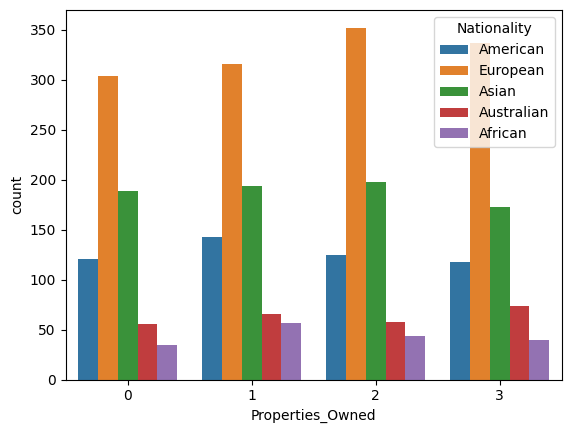

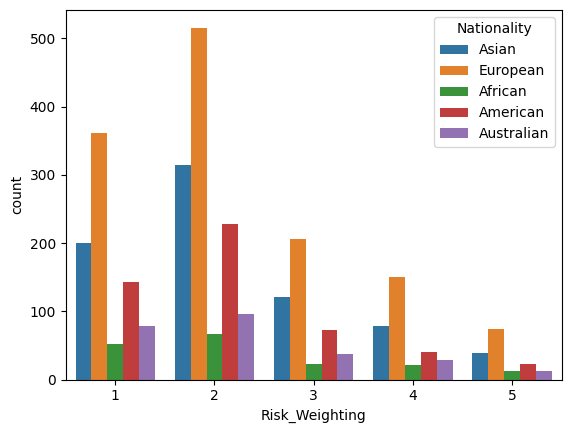

In [24]:
##Bivariate Analysis on the basis of Nationality.
for i,pred in enumerate(catcols):
    plt.figure(i)
    sns.countplot(data=df,x=pred,hue=df['Nationality'])

Not much of a significant insight, apart from European nationals dominating every parameter.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### NUMERICAL ANALYSIS

In [10]:
df.columns

Index(['Client_ID', 'Name', 'Age', 'Location_ID', 'Joined_Bank',
       'Banking_Contact', 'Nationality', 'Occupation', 'Fee_Structure',
       'Loyalty_Classification', 'Estimated_Income', 'Superannuation_Savings',
       'Amount_of_Credit_Cards', 'Credit_Card_Balance', 'Bank_Loans',
       'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts',
       'Foreign_Currency_Account', 'Business_Lending', 'Properties_Owned',
       'Risk_Weighting', 'BRId', 'GenderId', 'IAId'],
      dtype='object')

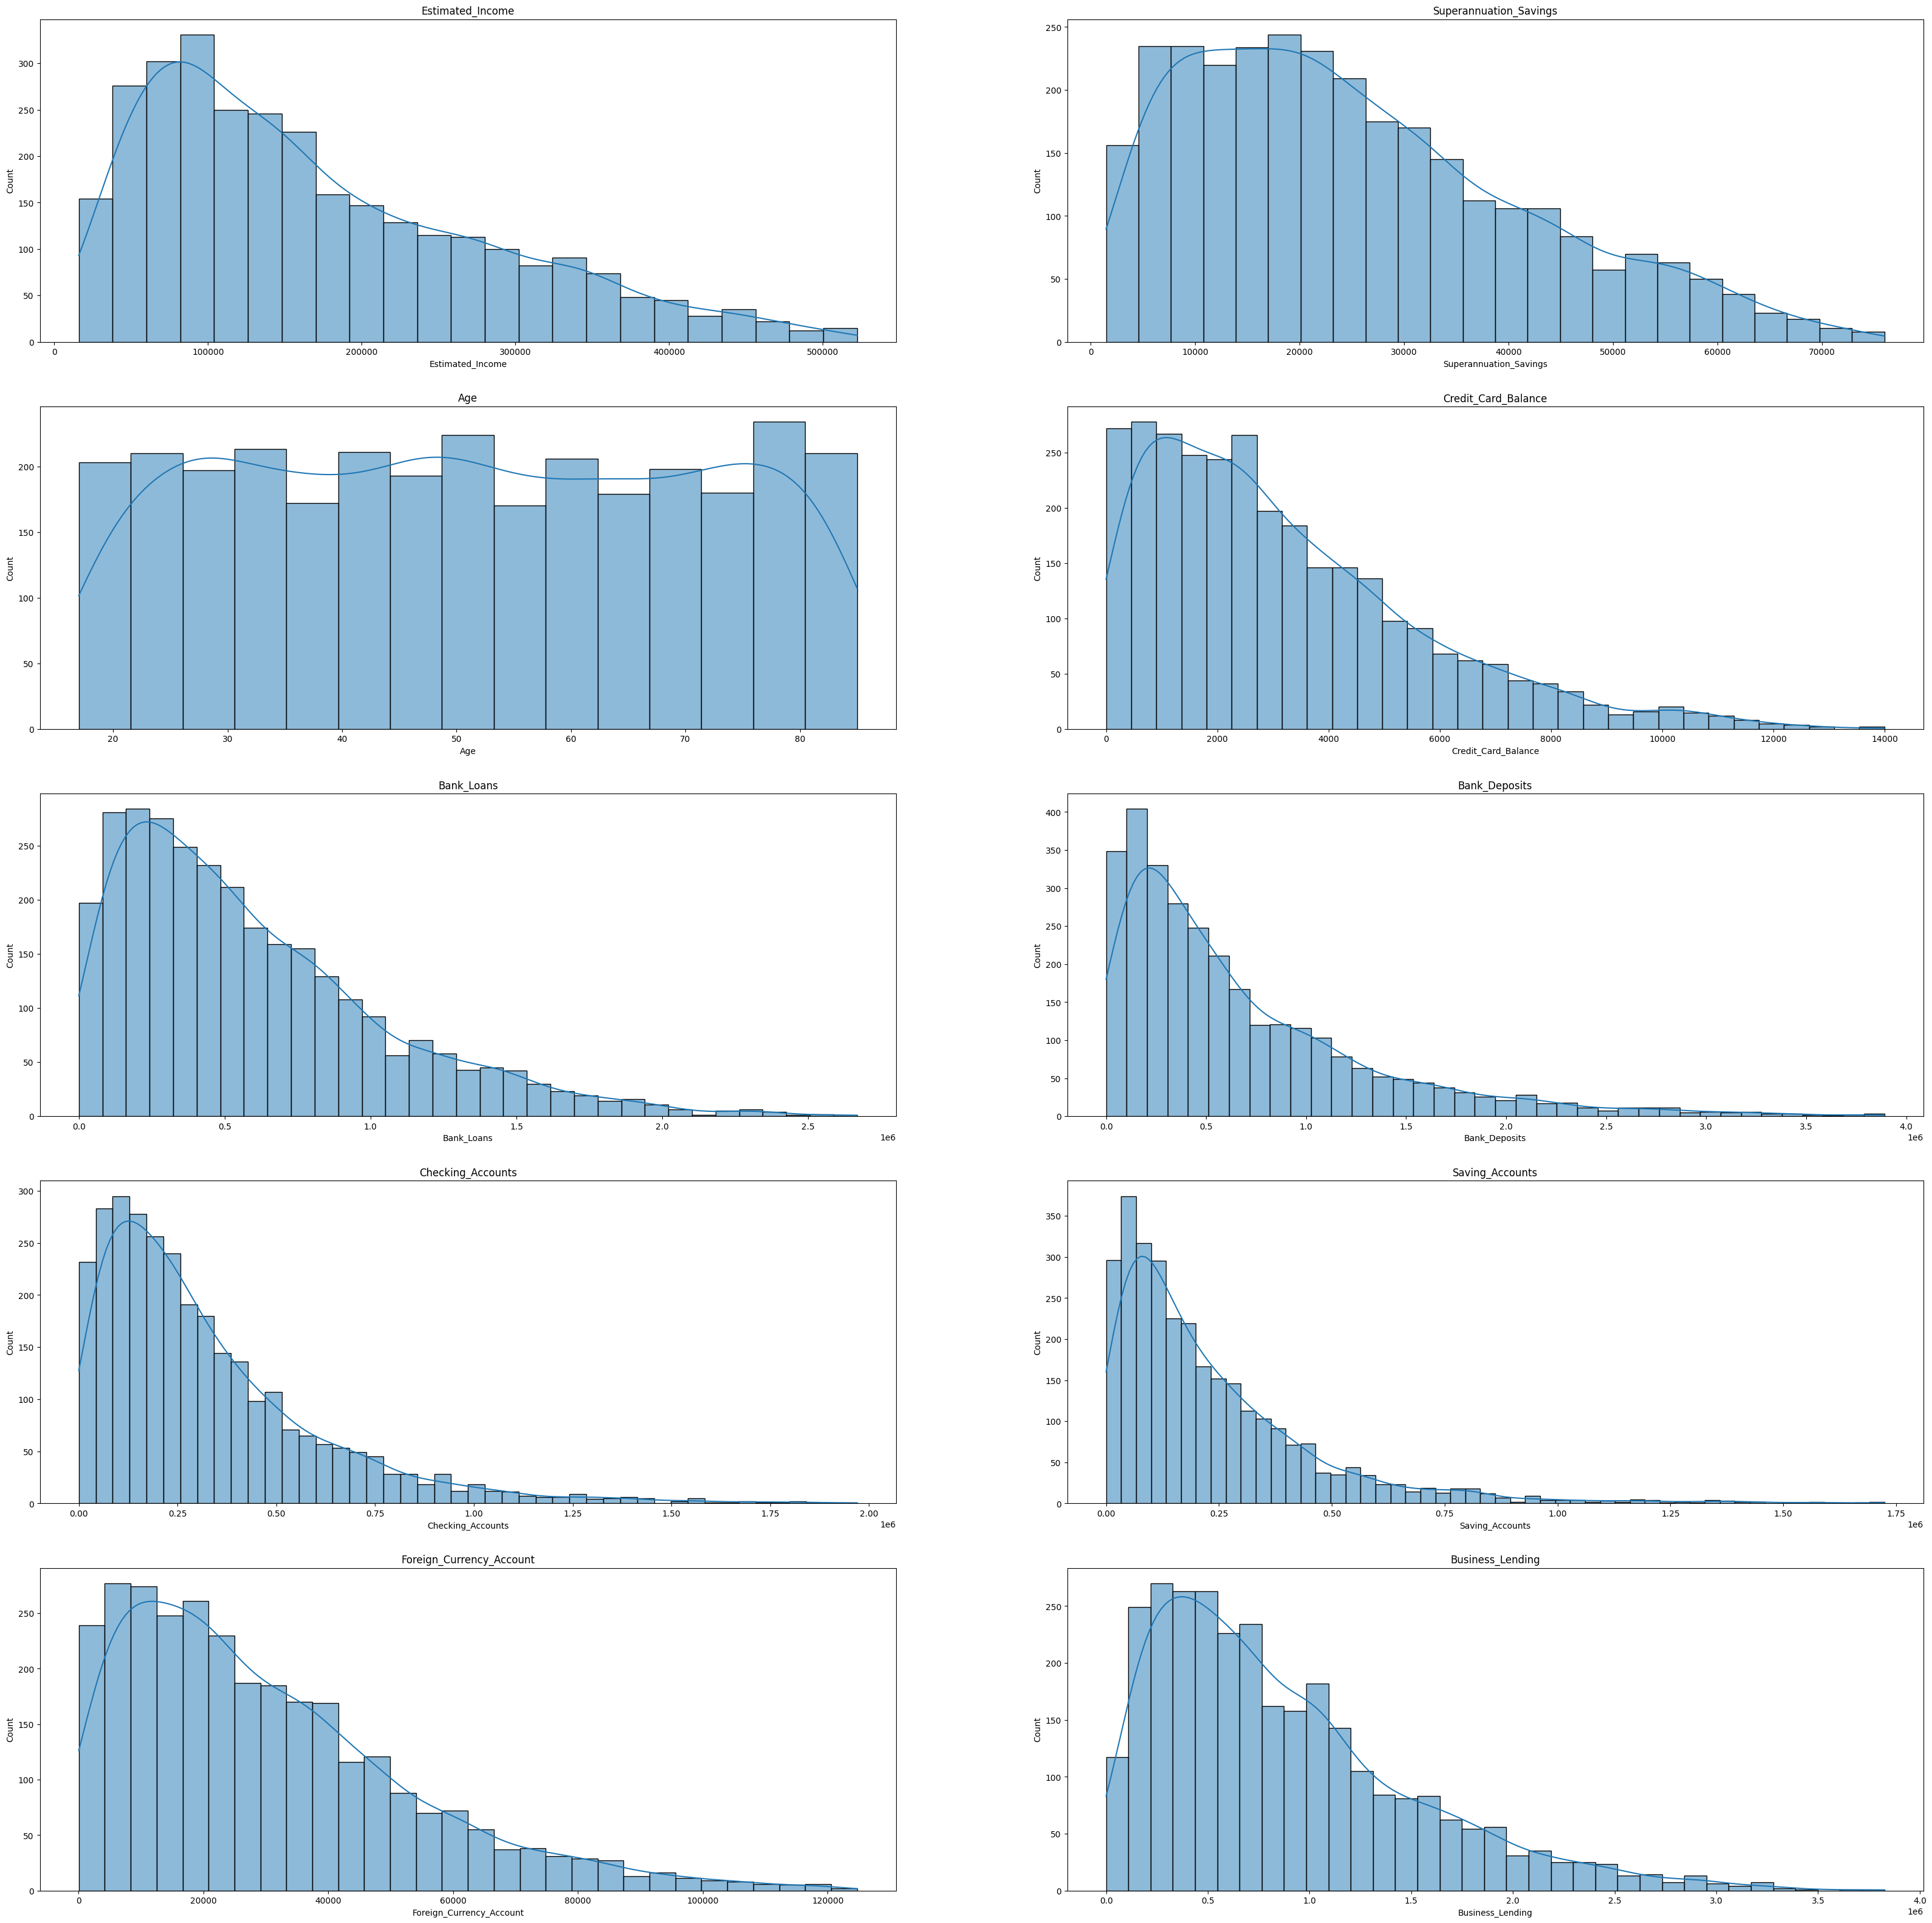

In [15]:
##Univariate Analysis
numcol=['Estimated_Income','Superannuation_Savings','Age','Credit_Card_Balance','Bank_Loans','Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts',
       'Foreign_Currency_Account', 'Business_Lending']
plt.figure(figsize=(40,40))
for i,col in enumerate(numcol):
    plt.subplot(5,2,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.show()

INSIGHTS:
1. All the numerical columns except the Age column are right-skewed.
2. Age column is almost uniformly distributed.

Let us prepare a heatmap to get a better idea of correlation between vaious numerical columns.

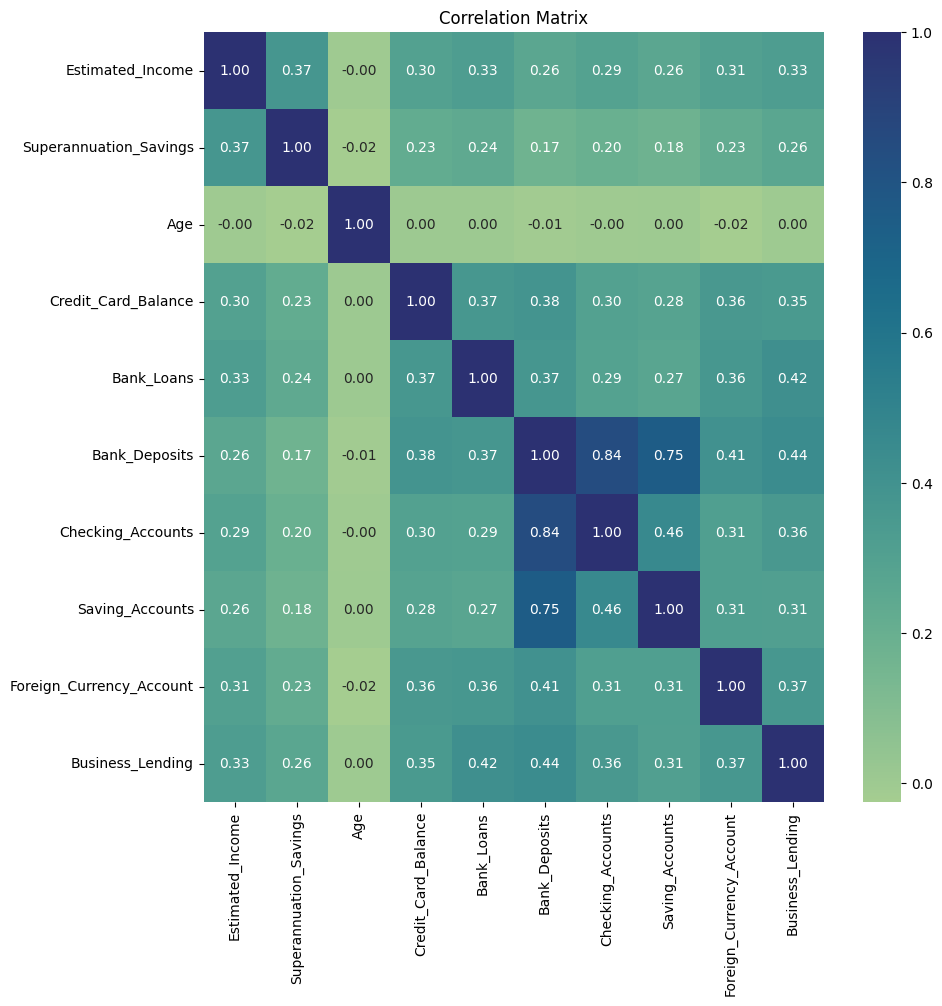

In [19]:
##HEATMAP
corr_matrix=df[numcol].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='crest',fmt=".2f",annot=True)
plt.title("Correlation Matrix")
plt.show()

In [21]:
for col in numcol:
    cor=df['Properties_Owned'].corr(df[col])
    print(cor)

-0.008174720305534736
0.024669168880117543
0.002228954656141084
0.0023537101023497113
0.01468671354637382
-0.013553455920348038
-0.008913718552722542
-0.025503441500746384
-0.011343125539592158
0.01788351327741011


INSIGHTS:
1. Age has an extremely weak (almost no) correlation with every other variable, so it is an insignificant varible considered.
2. Bank Deposits have extremely strong and positive correlation with Checking Accounts and Saving Accounts, and a mildly strong but also positive correlation with Foreign Currency Account and Business Lending.
This indicates two things:-
   
   a. Customers with a high account balance in one type of account maintain substantial funds across other account types too. Indicates that customers who use more banking services tend to manage their funds with multiple types of account.

   b. As a result, when the customer engages more with the banking services, they receive higher amounts of business lending, as they are perceived to be low-risk and loyal.
3. Property ownership may depend on external factors (location, real estate market conditions, inheritance, etc.) that are not captured by these particular banking variables. Hence, we see weaker correlations here.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------